## COVID Daily casualties Analysis Table and Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 
   
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas
!pip install tabulate
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.6 MB/s eta 0:00:01    |█████                           | 1.6 MB 3.6 MB/s eta 0:00:03     |█████████████████████▌          | 6.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 41.0 MB/s eta 0:00:01
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1836      0 --:--:-- --:--:-- --:--:--  1868
100 42749  100 42749    0     0   193k      0 --:--:-- --:--:-- --:--:--  193k


In [19]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [20]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
Country/Region,,,,,,,,,,,,,
Austria,3,3,4,6,6,8,16,21,28,30,49,58,68
Belgium,5,10,14,21,37,67,75,88,122,178,220,289,353
Brazil,0,1,3,6,11,15,25,34,46,59,77,92,111
China,3099,3111,3122,3130,3133,3139,3153,3153,3160,3163,3169,3174,3177
Denmark,3,4,4,6,9,13,13,24,32,34,41,52,65
France,148,148,148,243,450,562,674,860,1100,1331,1696,1995,2314
Germany,17,24,28,44,67,84,94,123,157,206,267,342,433
Indonesia,5,5,19,25,32,38,48,49,55,58,78,87,102
Iran,853,988,1135,1284,1433,1556,1685,1812,1934,2077,2234,2378,2517


In [22]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily casualties 
  #### In-Order by 28March : Italy Spain US France UK Iran Netherlands 
   

In [23]:
df0.pop( df0.columns[0] )   # 0 
display(df0.sort_values(by=[df.columns[-1]],ascending=False).head(10)) 

,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
Country/Region,,,,,,,,,,,,
Italy,345,475,427,627,793,651,601,743,683,712,919,889
Spain,191,90,207,213,332,397,539,497,839,718,773,844
US,23,10,82,44,63,110,140,149,236,267,372,445
France,0,0,95,207,112,112,186,240,231,365,299,319
United Kingdom,0,16,66,40,56,48,54,87,43,113,181,260
Iran,135,147,149,149,123,129,127,122,143,157,144,139
Netherlands,19,15,18,30,30,43,34,63,80,78,112,93
Germany,7,4,16,23,17,10,29,34,49,61,75,91
Belgium,5,4,7,16,30,8,13,34,56,42,69,64


In [24]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Austria,Belgium,Brazil,China,Denmark,France,Germany,Indonesia,Iran,Italy,"Korea, South",Netherlands,Philippines,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/17/20,0,5,1,12,1,0,7,0,135,345,6,19,0,1,191,1,13,1,0,23
3/18/20,1,4,2,11,0,0,4,14,147,475,3,15,7,1,90,3,1,0,16,10
3/19/20,2,7,3,8,2,95,16,6,149,427,7,18,-2,1,207,1,13,2,66,82
3/20/20,0,16,5,3,3,207,23,7,149,627,3,30,1,3,213,5,13,1,40,44
3/21/20,2,30,4,6,4,112,17,6,123,793,8,30,1,6,332,4,21,5,56,63
3/22/20,8,8,10,14,0,112,10,10,129,651,9,43,6,2,397,1,23,21,48,110
3/23/20,5,13,9,0,11,186,29,1,127,601,0,34,8,9,539,4,22,7,54,140
3/24/20,7,34,12,7,8,240,34,6,122,743,9,63,2,10,497,11,2,7,87,149
3/25/20,2,56,13,3,2,231,49,3,143,683,6,80,3,10,839,26,31,15,43,236
3/26/20,19,42,18,6,7,365,61,20,157,712,5,78,7,17,718,15,38,16,113,267


In [35]:
!pip install seaborn  

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


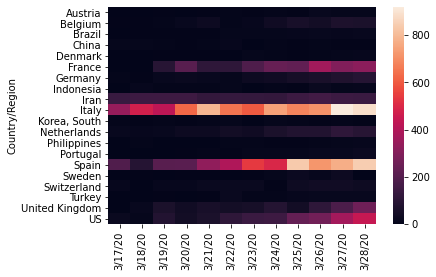

In [27]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

20 5.416666666666667


Country/Region
Austria           2.1
Belgium           1.5
Brazil            1.4
China             0.8
Denmark           2.4
France            1.3
Germany           2.0
Indonesia         2.7
Iran              1.1
Italy             1.3
Korea, South      0.9
Netherlands       1.4
Philippines       4.6
Portugal          2.0
Spain             1.2
Sweden            0.8
Switzerland       2.2
Turkey            1.5
United Kingdom    3.4
US                2.1
dtype: float64

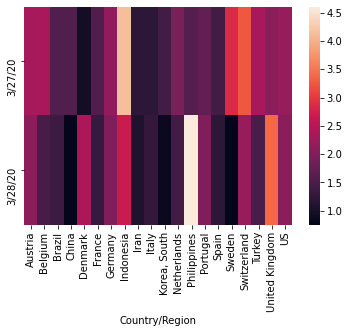

In [75]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [54]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,3/28/20
Country/Region,
United Kingdom,2.966805
Philippines,2.750000
Portugal,2.666667
US,2.552138
Germany,2.447433
Denmark,2.344262
Belgium,2.052478
Brazil,1.900000
Netherlands,1.716443


In [76]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)